# Import Library

In [4]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

# Load the Data

In [2]:
colorectal_df = pd.read_csv('colorectal_ml_data.csv')

In [3]:
colorectal_df

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,sample_type
0,3.668103,4.153008,3.401461,3.915518,7.376831,2.068961,2.815502,2.637667,2.515842,2.470253,...,2.171258,2.301055,2.082480,7.023443,4.885838,5.996857,2.180664,2.143840,2.112155,Mucosa
1,2.552636,4.188395,3.130526,3.736452,7.781563,2.309641,2.899258,2.405016,2.580665,2.199707,...,1.958912,2.062292,2.047534,7.316119,5.238207,6.263651,1.922922,2.261792,2.311441,Mucosa
2,3.319206,4.116970,3.254302,4.123577,6.490103,2.169527,2.740670,2.417271,2.592297,2.604158,...,2.425428,2.459687,2.208400,8.021523,5.811114,6.369939,2.180858,2.216643,2.225330,Mucosa
3,3.174137,4.376609,3.123351,3.357785,7.041836,2.181981,2.472447,2.288845,2.348740,2.467252,...,2.749743,2.474504,2.314847,7.102487,4.688705,5.138329,1.992875,2.276514,2.257504,Mucosa
4,3.002871,4.554020,3.374672,3.356307,6.941473,2.501181,2.858133,2.474647,2.360849,2.367759,...,2.124112,2.652263,2.418084,7.728243,5.234767,6.122501,2.176288,2.297174,2.116751,Mucosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2.770133,3.817872,3.110288,4.323042,3.107871,2.195812,2.491845,2.413078,2.240754,2.191541,...,2.320057,2.392613,2.107074,6.895752,4.958211,5.902607,2.061423,1.968173,2.199589,Tumor
242,2.585589,3.801793,2.800115,3.256401,2.655157,2.066929,2.873851,2.338475,2.061385,2.134022,...,2.090564,2.245866,2.022377,7.007755,4.982673,5.821546,1.900465,2.159099,2.013992,Tumor
243,3.140119,4.361736,3.415892,3.434901,3.018483,2.166360,2.757030,2.424478,2.021578,2.223915,...,2.431213,2.186004,2.241437,6.450306,4.329660,5.151521,2.103759,2.067776,2.021599,Tumor
244,4.806558,5.504357,4.433731,4.611937,2.786727,2.320301,2.559451,2.248668,2.288134,2.219938,...,2.498920,2.064534,2.173000,6.983111,4.950685,6.041215,2.010045,2.265831,2.230217,Tumor


# Separate the Data into Target and Feature Variable

In [6]:
X=colorectal_df.iloc[:,0:-1]
y=colorectal_df.iloc[:,-1]

In [7]:
y

0      Mucosa
1      Mucosa
2      Mucosa
3      Mucosa
4      Mucosa
        ...  
241     Tumor
242     Tumor
243     Tumor
244     Tumor
245     Tumor
Name: sample_type, Length: 246, dtype: object

# Encode Lables

In [8]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [9]:
classes

array([0, 1, 2])

In [10]:
labels

array(['Mucosa', 'Normal', 'Tumor'], dtype=object)

# Data splilting into traning testing and validation sets

In [11]:
# Split data into train, validation, and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

In [12]:
# Standardize the data using Z-score normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Feature Selection Methods

In [43]:
# Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k=1000)
X_train_selected = selector.fit_transform(X_train_norm, y_train)
X_test_selected = selector.transform(X_test_norm)
selected_features = X.columns[selector.get_support()]

# Model Traning

# Random Forest

In [48]:
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)
cv_scores_rf = cross_val_score(rf_clf, X_train_selected, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Random Forest Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_rf)))
rf_clf.fit(X_train_selected, y_train)


Random Forest Mean cross-validation accuracy: 0.98


RandomForestClassifier(max_depth=100, random_state=42)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.97
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       0.91      1.00      0.95        10
      Normal       1.00      0.95      0.97        20
       Tumor       1.00      1.00      1.00        20

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



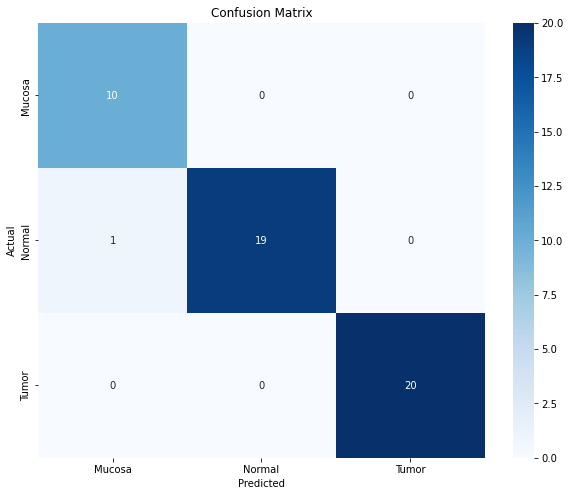

In [50]:
# Evaluate the model performance on the test set
y_pred = rf_clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine

In [17]:
# Train the SVM classifier with the selected features
svm_clf = SVC(kernel='rbf', C=1.0, random_state=42)
cv_scores_svm = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("SVM Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_svm)))
svm_clf.fit(X_train_selected,y_train)


SVM Mean cross-validation accuracy: 0.99


SVC(random_state=42)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



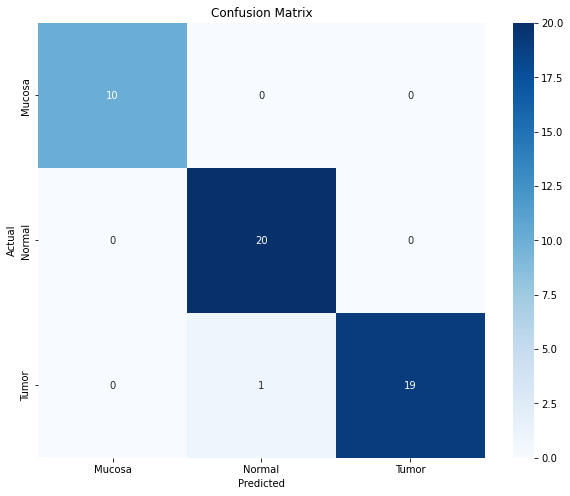

In [18]:
# Evaluate the model performance on the test set
y_pred = svm_clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# PCA Plot of the Data

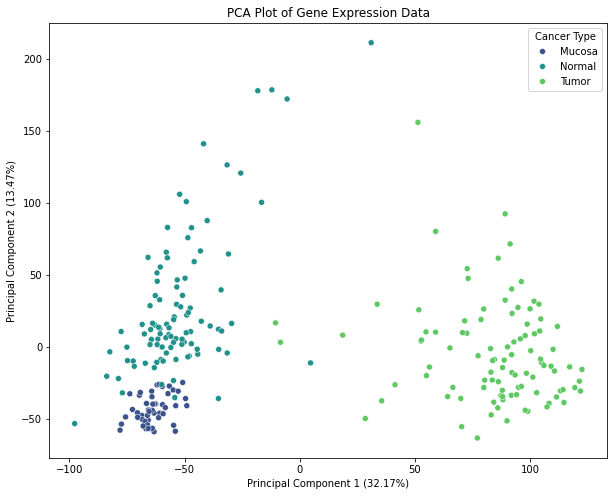

In [22]:
# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target labels to the DataFrame
pca_df['cancer_type'] = y

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cancer_type', data=pca_df, palette='viridis')
plt.title('PCA Plot of Gene Expression Data')
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)')
plt.legend(title='Cancer Type')
plt.show()


# Cross validation

# RF Model

In [51]:
# Perform cross-validation
rf_cv_scores = cross_val_score(rf_clf, X_train_selected, y_train, cv=5)

# Calculate the mean and standard deviation of cross-validation scores
print("Random Forest Cross-validation Accuracy Scores:")
print(rf_cv_scores)
print("Mean RF CV Accuracy:", np.mean(rf_cv_scores))
print("Std RF CV Accuracy:", np.std(rf_cv_scores))

Random Forest Cross-validation Accuracy Scores:
[1.         0.93333333 0.96551724 1.         1.        ]
Mean RF CV Accuracy: 0.9797701149425286
Std RF CV Accuracy: 0.026785308806674953


In [58]:
# Perform cross-validation
rf_cv_scores = cross_val_score(svm_clf, X_train_selected, y_train, cv=5)

# Calculate the mean and standard deviation of cross-validation scores
print("SVM Cross-validation Accuracy Scores:")
print(rf_cv_scores)
print("Mean SVM CV Accuracy:", np.mean(rf_cv_scores))
print("Std SVM CV Accuracy:", np.std(rf_cv_scores))

SVM Cross-validation Accuracy Scores:
[1.         0.96666667 1.         1.         1.        ]
Mean SVM CV Accuracy: 0.9933333333333334
Std SVM CV Accuracy: 0.01333333333333333
